In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

In [2]:
img_width = 200
img_height = 200
#Calling Images from Different Train and Validation
train_data_dir = 'D:\Thermal Detection 52AD major\Major Project S8\Data_Updated\Train'
validation_data_dir = 'D:\Thermal Detection 52AD major\Major Project S8\Data_Updated\Validation'
train_samples = 50
validation_samples = 50
epochs = 100
batch_size = 20

In [3]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [4]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 198, 198, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 97, 97, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        1

In [6]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR, img)
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img), np.array(label)])
    shuffle(traning_data)
    np.save('train_data.npy', traning_data)
    return training__data

In [7]:
import tensorflow.keras
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy', 
              optimizer=tensorflow.keras.optimizers.Adam(lr=.0001),
              metrics=['accuracy'])

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 93 images belonging to 4 classes.


In [10]:
print(train_generator.class_indices)

{'K.Abbhinhai': 0, 'K.Bijesh': 1, 'K.Pradeep': 2, 'Rohith.Kumar': 3}


In [11]:
imgs, labels = next(train_generator)

In [12]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

20
[1. 0. 0. 0.]


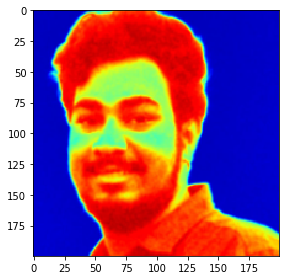

[0. 1. 0. 0.]


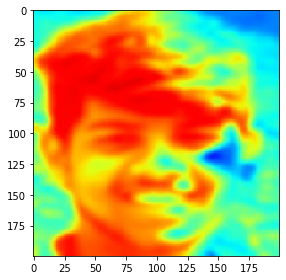

[1. 0. 0. 0.]


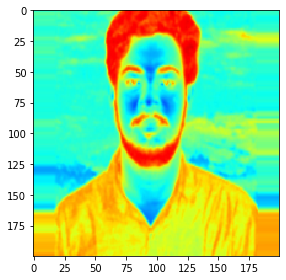

[0. 1. 0. 0.]


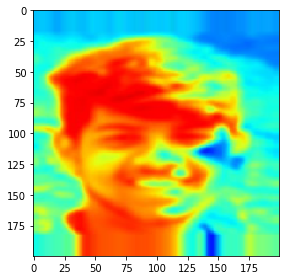

[0. 0. 1. 0.]


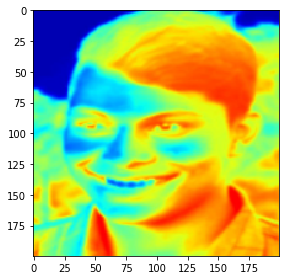

[0. 1. 0. 0.]


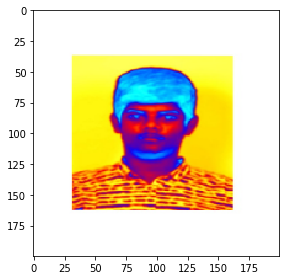

[0. 0. 1. 0.]


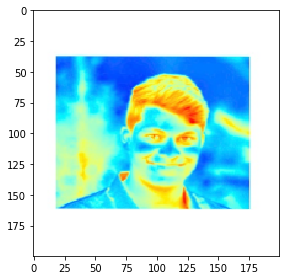

[0. 0. 1. 0.]


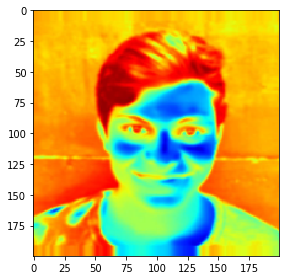

[0. 0. 0. 1.]


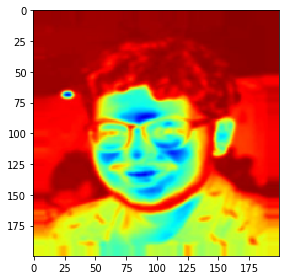

[0. 0. 0. 1.]


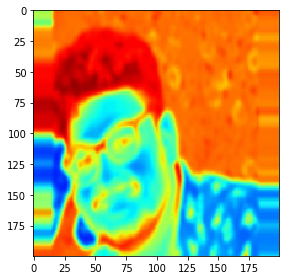

[0. 0. 1. 0.]


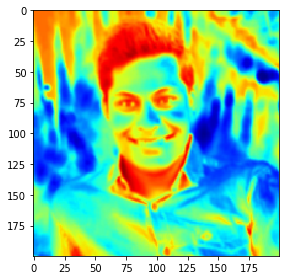

[1. 0. 0. 0.]


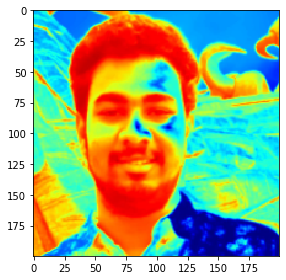

[0. 1. 0. 0.]


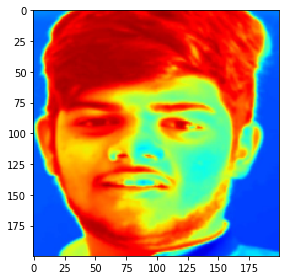

[1. 0. 0. 0.]


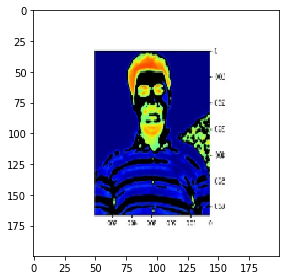

[0. 0. 1. 0.]


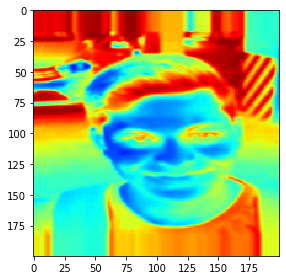

[0. 0. 0. 1.]


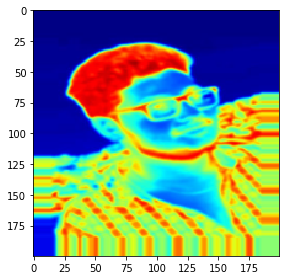

[0. 0. 0. 1.]


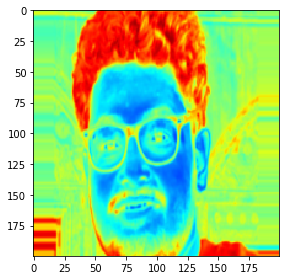

[1. 0. 0. 0.]


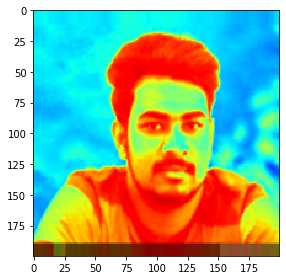

[0. 0. 0. 1.]


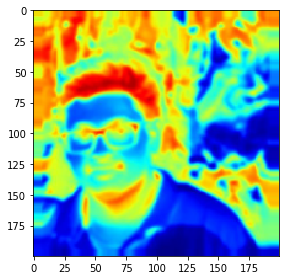

[0. 1. 0. 0.]


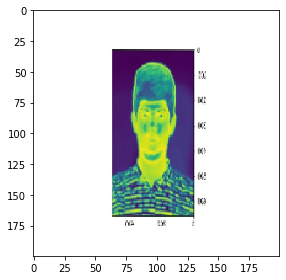

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [14]:
validation_generator = train_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 93 images belonging to 4 classes.


In [15]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

c:\python36\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
2/2 [==============================] - 18s 11s/step - loss: 1.3701 - accuracy: 0.2500 - val_loss: 1.3772 - val_accuracy: 0.3000
Epoch 2/100
2/2 [==============================] - 5s 3s/step - loss: 1.4489 - accuracy: 0.1667 - val_loss: 1.3623 - val_accuracy: 0.2750
Epoch 3/100
2/2 [==============================] - 4s 3s/step - loss: 1.4582 - accuracy: 0.2333 - val_loss: 1.3498 - val_accuracy: 0.3000
Epoch 4/100
2/2 [==============================] - 4s 2s/step - loss: 1.4429 - accuracy: 0.2500 - val_loss: 1.3594 - val_accuracy: 0.3500
Epoch 5/100
2/2 [==============================] - 4s 2s/step - loss: 1.3869 - accuracy: 0.3960 - val_loss: 1.3837 - val_accuracy: 0.3500
Epoch 6/100
2/2 [==============================] - 4s 3s/step - loss: 1.4362 - accuracy: 0.1119 - val_loss: 1.3860 - val_accuracy: 0.3000
Epoch 7/100
2/2 [==============================] - 3s 2s/step - loss: 1.4097 - accuracy: 0.1510 - val_loss: 1.3456 - val_accuracy: 0.5000
Epoch 8/100
2/2 [===============

Epoch 60/100
2/2 [==============================] - 20s 11s/step - loss: 0.8886 - accuracy: 0.6333 - val_loss: 0.7632 - val_accuracy: 0.8500
Epoch 61/100
2/2 [==============================] - 4s 2s/step - loss: 0.9621 - accuracy: 0.6333 - val_loss: 0.7613 - val_accuracy: 0.7500
Epoch 62/100
2/2 [==============================] - 4s 2s/step - loss: 0.5902 - accuracy: 0.8833 - val_loss: 0.6041 - val_accuracy: 0.8500
Epoch 63/100
2/2 [==============================] - 4s 2s/step - loss: 0.8529 - accuracy: 0.5667 - val_loss: 0.6638 - val_accuracy: 0.8500
Epoch 64/100
2/2 [==============================] - 4s 3s/step - loss: 0.7027 - accuracy: 0.7358 - val_loss: 0.7235 - val_accuracy: 0.7750
Epoch 65/100
2/2 [==============================] - 4s 2s/step - loss: 0.8967 - accuracy: 0.4833 - val_loss: 0.6657 - val_accuracy: 0.8000
Epoch 66/100
2/2 [==============================] - 4s 3s/step - loss: 0.7266 - accuracy: 0.6576 - val_loss: 0.6443 - val_accuracy: 0.8250
Epoch 67/100
2/2 [=======

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


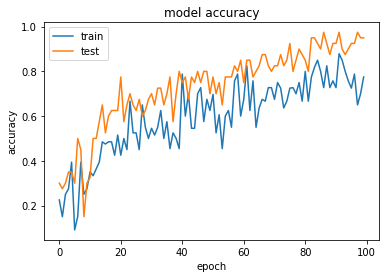

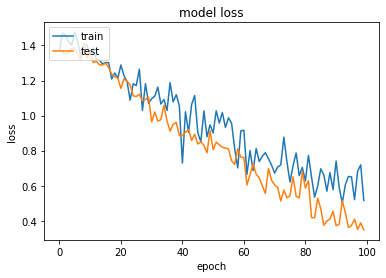

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("./Output1_Updated")
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("./Output2_Updated")
plt.show()

In [27]:
predict_dir_path='D:/Cojag/Thermal/Thermal Detection Brijesh/Data_Updated/Test'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['K.Abbhinhai.JPG', 'K.bijesh.JPG', 'K.Pradeep.JPG', 'Rohit.Kumar.JPG']


In [28]:
# predicting images
from tensorflow.keras.preprocessing import image
K_Abbhinhai = 0
K_Bijesh = 0
K_Pradeep = 0
Rohith_Kumar = 0


for file in onlyfiles:
    img = image.load_img(predict_dir_path+'/'+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    classes = np.argmax(classes, axis=1)
    print(classes)
    
    if classes == 0:
        print(file + ": " + 'Abbhihai')
        K_Abbhinhai += 1
    elif classes == 1:
        print(file + ": " + 'Bijesh')
        K_Bijesh += 1
    elif classes == 2:
        print(file + ": " + 'Pradeep')
        K_Pradeep += 1
    else :
        print(file + ": " + 'Rohith')
        Rohith_Kumar += 1
print("Total Abbhihai Images :",K_Abbhinhai)
print("Total Bijesh Images :",K_Bijesh)
print("Total Pradeep Images :",K_Pradeep)
print("Total Rohith Images :",Rohith_Kumar)

[0]
K.Abbhinhai.JPG: Abbhihai
[3]
K.bijesh.JPG: Rohith
[2]
K.Pradeep.JPG: Pradeep
[3]
Rohit.Kumar.JPG: Rohith
Total Abbhihai Images : 1
Total Bijesh Images : 0
Total Pradeep Images : 1
Total Rohith Images : 2


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 198, 198, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 97, 97, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        1

In [30]:
import os.path
if os.path.isfile('models/Classification_Updated.h5') is False:
    model.save('models/Classification_Updated.h5')

In [31]:
from tensorflow.keras.models import load_model
new_model = load_model('models/Classification_Updated.h5')

In [32]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 198, 198, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 97, 97, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        1

In [33]:
new_model.get_weights()

[array([[[[ 7.08682090e-02, -4.64947894e-02,  7.20778331e-02,
           -2.12480985e-02, -6.91105262e-04,  9.19305906e-02,
           -8.13741162e-02,  1.17420144e-01,  1.26986325e-01,
           -9.83121619e-02, -7.50405341e-02, -2.45991088e-02,
            1.01117089e-01, -3.76287736e-02, -8.87283459e-02,
            3.87008004e-02, -8.15688074e-02,  8.64199735e-03,
           -3.47961448e-02,  1.03807025e-01,  2.17169747e-02,
            3.62271033e-02, -1.07515633e-01,  6.55193180e-02,
           -4.11548764e-02,  1.25100300e-01,  1.04497626e-01,
           -9.37158167e-02, -6.14667125e-02, -3.48083489e-02,
            7.31813386e-02,  1.09414071e-01],
          [-1.45904627e-02,  2.15974376e-02,  6.72176853e-02,
           -8.67308956e-03,  1.37176797e-01, -1.03145979e-01,
           -1.36521429e-01,  2.91230548e-02,  1.24464445e-02,
            1.51270460e-02, -1.22226160e-02, -7.28399605e-02,
           -6.04368709e-02, -1.28864618e-02, -1.13129154e-01,
            5.79181388e-

In [34]:
new_model.optimizer